# Author - Gaurav Tuklia
# GRIP: The Sparks Foundation
## Data Science & Business Analytics Intern
### Task-1: Prediction using Supervised ML 
#### Batch - December 2021
Tasks: 
1. To predict the percentage of a student based on the number of study hours.
2. What will be predicted score if a student studies for 9.25 hrs/day?

## Importing Required Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Importing and Reading Data from csv file

In [29]:
data = pd.read_csv("Student_Scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring the Data

In [35]:
#Checking the Shape of the dataset
#shape: A tuple representing the dimensionality of the DataFrame.
data.shape

(25, 2)

In [40]:
#Using describe function
#describe: Returns summary statistics of the Series or DataFrame provided. 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
#Checking if any null values are present in the data
data.isnull == True

False

#### False means there are no null values in the given data

## Visualizing the Data

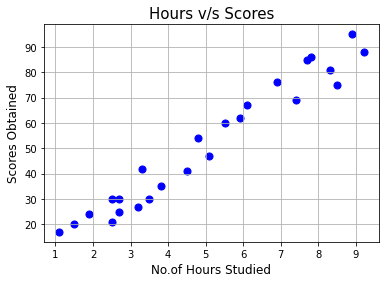

In [46]:
plt.scatter(data['Hours'], data['Scores'], color='blue', s=50)
plt.title("Hours v/s Scores", size=15)
plt.xlabel("No.of Hours Studied", size=12)
plt.ylabel("Scores Obtained", size=12)
plt.grid()
plt.show()

## Splitting and Training the Data

In [53]:
#Dividing the data using iloc
X = data.iloc[:, :-1].values       # X will consist of all the rows and all the columns except the last column
Y = data.iloc[:, -1].values        # Y will consist of all the rows and only the last column

In [54]:
#Printing X
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [55]:
#Printing Y
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Splitting the data into train and test set using train_test_split() method of Scikit-learn library

In [57]:
#Splitting is done in 80:20 manner, i.e. 80% of entire data is for training and 20% for testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [58]:
X_train            #Training Data

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [59]:
X_test              #Testing Data

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

#### Training the data

In [62]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
print("Model is trained!!!")

Model is trained!!!


## Finding the Equation of fit line

In [66]:
# Finding the parameters of the line mainly the slope and intercept as it is a simple linear regression with only 2 parameters.

#Finding the slope
slope = regression.coef_

#Finding the intercept
intercept = regression.intercept_

print("Slope of the line is: ", float(slope))
print("Intercept of the line is: ", float(intercept))

Slope of the line is:  9.910656480642237
Intercept of the line is:  2.018160041434683


Since, the equation of the line is: y = mx + c, therefore we get:

Scores = 9.910656480642237*(Hours) + 2.018160041434683

## Visualizing the Model

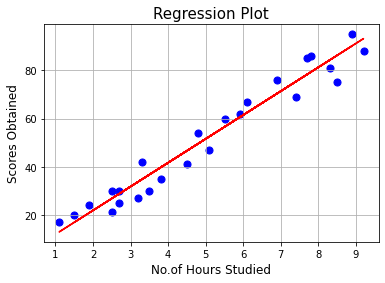

In [70]:
# y = mx + c
line = slope*X + intercept
plt.scatter(X, Y, color='blue', s=50)
plt.plot(X, line, color='red')
plt.title("Regression Plot", size=15)
plt.xlabel("No.of Hours Studied", size=12)
plt.ylabel("Scores Obtained", size=12)
plt.grid()
plt.show()

## Making Predictions

In [76]:
#Predicting the scores obtained using the trained model/algorithm

y_pred = regression.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

This is our predicted output. Now, lets compare the actual and the predicted result

In [77]:
comparison = pd.DataFrame({'Actual Scores': Y_test, 'Predicted Scores': y_pred})
comparison

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Model Evaluation

In [79]:
print("Mean Absolute Error is: ", metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error is: ", metrics.mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error is: ", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error is:  4.183859899002975
Mean Squared Error is:  21.5987693072174
Root Mean Squared Error is:  4.6474476121003665


# What will be predicted score if a student studies for 9.25 hrs/day?

In [91]:
hours = 9.25
predicted_score = regression.predict([[hours]])
print(f"No.of hrs is: {hours}")
print(f"Predicted Score is: {predicted_score[0]}")

No.of hrs is: 9.25
Predicted Score is: 93.69173248737538


## According to the regression model, if a student studies for 9.25 hrs/day, then the predicted score will be 93.69.

                                               Thank You